In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy as sp
import os
import PlaceCellAnalysis as pc
import pickle

os.sys.path.append('../')
import utilities as u
import preprocessing as pp
import behavior as b
import logistic_regression as lr

from sklearn.linear_model import LogisticRegressionCV, LogisticRegression


%load_ext autoreload
%autoreload 2

%matplotlib inline

In [3]:
df = pp.load_session_db()
df = df[df['RewardCount']>30]
df = df[df['Imaging']==1]
df = df.sort_values(['MouseName','DateTime','SessionNumber'])
tracks = 'TwoTower_noTimeout|TwoTower_Timeout|Reversal_noTimeout|Reversal|TwoTower_foraging'
df = df[df['Track'].str.contains(tracks,regex=True)]


G:\My Drive\VR_Data\TwoTower\behavior.sqlite


In [109]:
mouse = '4139265.4'
df_mouse = df[df['MouseName'].str.match(mouse)]
df_mouse

,MouseName,DateFolder,SessionNumber,Track,RewardCount,Imaging,ImagingRegion,DateTime,data file,scanfile,scanmat,s2pfolder
1371,4139265.4,07_02_2019,2,TwoTower_foraging,60,1,CA1,2019-02-07,G:\My Drive\VR_Data\TwoTower\4139265.4\07_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\07_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\07_02_2...
1373,4139265.4,07_02_2019,4,TwoTower_foraging,60,1,CA1,2019-02-07,G:\My Drive\VR_Data\TwoTower\4139265.4\07_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\07_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\07_02_2...
1407,4139265.4,10_02_2019,2,TwoTower_foraging,60,1,CA1,2019-02-10,G:\My Drive\VR_Data\TwoTower\4139265.4\10_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\10_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\10_02_2...
1436,4139265.4,12_02_2019,2,TwoTower_foraging,85,1,CA1,2019-02-12,G:\My Drive\VR_Data\TwoTower\4139265.4\12_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\12_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\12_02_2...
1459,4139265.4,15_02_2019,3,TwoTower_foraging,82,1,CA1,2019-02-15,G:\My Drive\VR_Data\TwoTower\4139265.4\15_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\15_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\15_02_2...
1478,4139265.4,17_02_2019,2,TwoTower_foraging,94,1,CA1,2019-02-17,G:\My Drive\VR_Data\TwoTower\4139265.4\17_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\17_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\17_02_2...
1489,4139265.4,18_02_2019,2,TwoTower_foraging,101,1,CA1,2019-02-18,G:\My Drive\VR_Data\TwoTower\4139265.4\18_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\18_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\18_02_2...
1498,4139265.4,19_02_2019,2,TwoTower_foraging,97,1,CA1,2019-02-19,G:\My Drive\VR_Data\TwoTower\4139265.4\19_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\19_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\19_02_2...
1510,4139265.4,20_02_2019,2,TwoTower_foraging,99,1,CA1,2019-02-20,G:\My Drive\VR_Data\TwoTower\4139265.4\20_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\20_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\20_02_2...
1516,4139265.4,21_02_2019,2,TwoTower_foraging,97,1,CA1,2019-02-21,G:\My Drive\VR_Data\TwoTower\4139265.4\21_02_2...,None,G:\My Drive\2P_Data\TwoTower\4139265.4\21_02_2...,G:\My Drive\2P_Data\TwoTower\4139265.4\21_02_2...


In [110]:
sess = df_mouse.iloc[-1]
fname = os.path.join("G:\\My Drive\\Figures\\TwoTower\\LogReg_smooth",mouse,"%s_%d_Xhat.pkl" % (sess['DateFolder'],sess['SessionNumber']))


In [111]:
VRDat,C, S, A = pp.load_scan_sess(sess)


num aberrant ttls 0.0
32084 (32084,) (32084, 21) 105601
frame diff 0


In [112]:
trial_info, tstart_inds, teleport_inds = u.by_trial_info(VRDat)
S_trial_mat, occ_trial_mat, edges,centers = u.make_pos_bin_trial_matrices(S,VRDat['pos']._values,VRDat['tstart']._values,VRDat['teleport']._values)
effMorph = trial_info['morphs']+trial_info['bckgndJitter']+trial_info['towerJitter']
effMorph = (effMorph+.2)/1.4

In [113]:
with open(fname,"rb") as f:
    d = pickle.load(f)
    Xhat = d['Xhat']

In [114]:
print(Xhat.shape)

(32084, 44)


In [115]:

num,den = Xhat[:,:22].sum(axis=1),Xhat[:,22:].sum(axis=1)
rat = np.log(num)-np.log(den)


C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in log
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\mplitt\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in subtract
  This is separate from the ipykernel package so we can avoid doing imports until


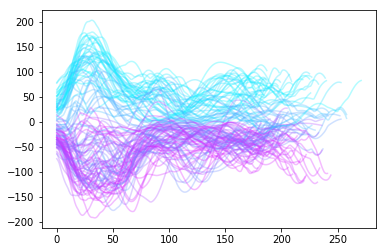

In [116]:
f,ax = plt.subplots()
for ind,(tstart,tstop) in enumerate(zip(tstart_inds.to_list(),teleport_inds.tolist())):
    ax.plot(rat[tstart:tstop],color=plt.cm.cool(effMorph[ind]),alpha=.3)
    

In [117]:
rat_trial_mat = u.make_pos_bin_trial_matrices(rat,VRDat.pos._values,VRDat['tstart']._values,VRDat['teleport']._values,mat_only=True,bin_size=10)

In [118]:
print(rat_trial_mat.shape,trial_info['morphs'].shape)

(120, 45) (120,)


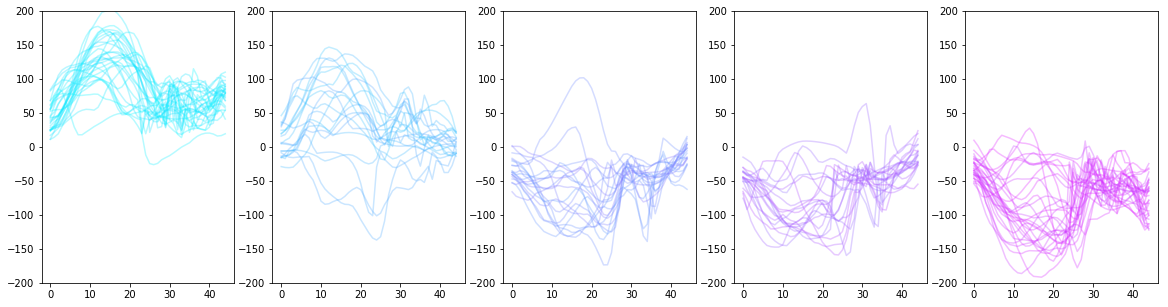

In [119]:
f,ax = plt.subplots(1,5,figsize=[20,5])
for ind in range(rat_trial_mat.shape[0]):
    if trial_info['morphs'][ind]==0:
        ax[0].plot(rat_trial_mat[ind,:],color=plt.cm.cool(effMorph[ind]),alpha=.3)
        ax[0].set_ylim([-200,200])
    elif trial_info['morphs'][ind]==.25:
        ax[1].plot(rat_trial_mat[ind,:],color=plt.cm.cool(effMorph[ind]),alpha=.3)
        ax[1].set_ylim([-200,200])
    elif trial_info['morphs'][ind]==.5:
        ax[2].plot(rat_trial_mat[ind,:],color=plt.cm.cool(effMorph[ind]),alpha=.3)
        ax[2].set_ylim([-200,200])
    elif trial_info['morphs'][ind]==.75:
        ax[3].plot(rat_trial_mat[ind,:],color=plt.cm.cool(effMorph[ind]),alpha=.3)
        ax[3].set_ylim([-200,200])
    elif trial_info['morphs'][ind]==1:
        ax[4].plot(rat_trial_mat[ind,:],color=plt.cm.cool(effMorph[ind]),alpha=.3)
        ax[4].set_ylim([-200,200])

In [120]:
morph_edges = np.linspace(0,1,num=11)
dm = morph_edges[1]-morph_edges[0]
morph_centers = morph_edges[1:]-dm
morph_dig = np.digitize(effMorph,morph_edges[1:],right=True)
morph_binned = np.zeros(effMorph.shape)
for i,c in enumerate(morph_centers.tolist()):
    morph_binned[morph_dig==i]=c
print(morph_binned,effMorph)

[0.6 0.  0.4 0.3 0.8 0.  0.8 0.  0.1 0.4 0.8 0.5 0.4 0.  0.6 0.3 0.4 0.
 0.  0.  0.  0.  0.6 0.  0.4 0.3 0.4 0.2 0.1 0.6 0.8 0.6 0.4 0.6 0.5 0.
 0.4 0.8 0.3 0.2 0.2 0.5 0.5 0.8 0.4 0.6 0.2 0.8 0.1 0.1 0.7 0.2 0.1 0.7
 0.8 0.4 0.4 0.1 0.8 0.8 0.5 0.1 0.8 0.3 0.  0.1 0.8 0.2 0.8 0.  0.5 0.8
 0.2 0.7 0.4 0.7 0.8 0.8 0.8 0.5 0.6 0.  0.2 0.4 0.8 0.  0.7 0.5 0.1 0.6
 0.8 0.3 0.1 0.  0.3 0.  0.6 0.  0.4 0.8 0.7 0.3 0.8 0.8 0.7 0.2 0.6 0.7
 0.2 0.  0.5 0.2 0.5 0.2 0.3 0.8 0.7 0.4 0.6 0. ] [0.69280764 0.0609626  0.45948719 0.31346542 0.86385469 0.09536377
 0.86241346 0.06470752 0.12378871 0.42453329 0.85949612 0.529952
 0.49690223 0.08565546 0.63848982 0.32041266 0.44872472 0.04675619
 0.06937584 0.06405199 0.06944226 0.07882124 0.62204953 0.06981126
 0.43536553 0.31667331 0.40658846 0.28678892 0.12668429 0.67281082
 0.86336506 0.68812561 0.49540145 0.60620399 0.58495521 0.08742913
 0.40531328 0.86287699 0.34392284 0.22626123 0.28180987 0.59466356
 0.58984781 0.8394978  0.44023567 0.62830616 0.

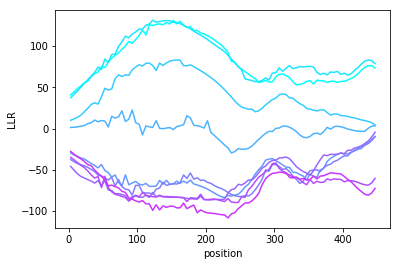

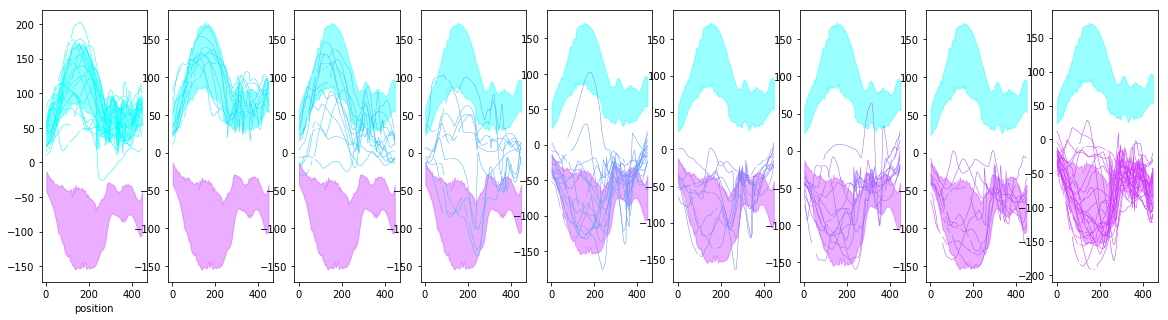

In [121]:
lr.plot_llr(rat,morph_binned,VRDat)

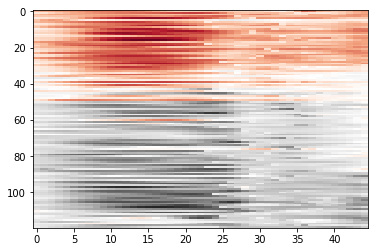

In [129]:
f,ax = plt.subplots()
ax.imshow(-rat_trial_mat[np.argsort(effMorph),:],cmap='RdGy',aspect = 'auto',vmin=-200,vmax=200)